In [2]:
from pylab import xlabel, ylabel, title, plot, show, legend
from random import random

In [3]:
def proportion(t, tau):
    return 1-2**(-1*t/tau)

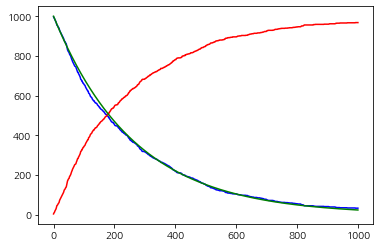

In [3]:
tau=3.053*60
h=1.0    #time
p=1.0-2**(-1*h/tau)    #확률
Ntl=1000
NPb=0
Ntl_list=list()
NPb_list=list()
ideal_list=list()

for t in range(1000):
    decay=0
    for i in range(Ntl):
        if random()<p:
            decay+=1
    Ntl-=decay
    NPb+=decay
    Ntl_list.append(Ntl)
    NPb_list.append(NPb)
    ideal_list.append(1000*(2**(-1*t/tau)))
    
plot(list(range(0,1000)),Ntl_list,'b')
plot(list(range(0,1000)),NPb_list,'r')
plot(list(range(0,1000)),ideal_list,'g')
show()

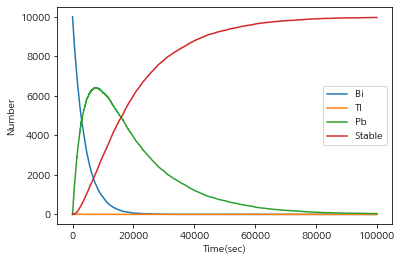

In [4]:
tau_Bi=46*60
tau_Tl=2.2*60
tau_Pb=3.3*60*60
h=1.0
p_Bi=proportion(h,tau_Bi)
p_Tl=proportion(h,tau_Tl)
p_Pb=proportion(h,tau_Pb)
NBi=10000
NTl=0
NPb=0
Nstable=0

NBi_list=list()
NTl_list=list()
NPb_list=list()
Nstable_list=list()

for t in range(100000):
    decay_Bi=0
    decay_Tl=0
    decay_Pb=0
    '''
    Pb, Tl, Bi 순으로 붕괴과정의 역순으로 붕괴시키면 이미 붕괴된게 다시 붕괴되는 일이 발생하지 않는다.
    '''
    #Pb 붕괴
    for i in range(NPb):
        if random()<p_Pb:
            decay_Pb+=1
            
    #Tl 붕괴
    for i in range(NTl):
        if random()<p_Tl:
            decay_Tl+=1
            
    #Bi 붕괴
    for i in range(NBi):
        if random()<p_Bi:
            decay_Bi+=1
    
    #Bi가 2.09% 확률로 Tl로 붕괴. 아니면 Pb로 붕괴
    for i in range(decay_Bi):
        if random()<0.0209:
            NTl+=1
        else:
            NPb+=1
    
    #붕괴된 만큼 갯수를 빼줌
    NBi-=decay_Bi
    NTl-=decay_Tl
    NPb-=decay_Pb
    
    #Pb는 Tl이 붕괴된 만큼 추가
    NPb+=decay_Tl
    #안정된 원소는 Pb가 붕괴된 만큼 추가
    Nstable+=decay_Pb
    
    NPb_list.append(NPb)
    NTl_list.append(NTl)
    NBi_list.append(NBi)
    Nstable_list.append(Nstable)

plot(NBi_list,label='Bi')
plot(NTl_list,label='Tl')
plot(NPb_list,label='Pb')
plot(Nstable_list,label='Stable')
xlabel('Time(sec)')
ylabel('Number')
legend(loc='center right')
show()